In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, \
                            accuracy_score
import numpy as np

Get the data

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
labels = ["Buying", "Maint", "Doors", "Persons", "lug_boot", "Safety", "Acceptable"]
data = pd.read_csv(url, names=labels)

In [3]:
data.head()

,Buying,Maint,Doors,Persons,lug_boot,Safety,Acceptable
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Turn the data from strings to numerical 

In [4]:
data["Buying"].replace({"vhigh" : 4, 
                        "high" : 3, 
                        "med" : 2, 
                        "low" : 1}, inplace=True)


data["Maint"].replace({"vhigh" : 4, 
                        "high" : 3, 
                        "med" : 2, 
                        "low" : 1}, inplace=True)

data["lug_boot"].replace({"big" : 3,
                          "med" : 2,
                          "small" : 1}, inplace=True)

data["Safety"].replace({"high" : 3, 
                        "med" : 2, 
                        "low" : 1}, inplace=True)

data["Acceptable"].replace({"unacc" : 0, 
                            "acc" : 1, 
                            "good" : 0, 
                            "vgood" : 1}, inplace=True)
data.head()

,Buying,Maint,Doors,Persons,lug_boot,Safety,Acceptable
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


All features will not be used

In [5]:
data = data[["Buying", "Maint", "Safety", "Acceptable"]]
data.head()

,Buying,Maint,Safety,Acceptable
0,4,4,1,0
1,4,4,2,0
2,4,4,3,0
3,4,4,1,0
4,4,4,2,0


Create our model and split the data for training

In [6]:
x = data.iloc[:, :3]
y = data.iloc[:, 3]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [7]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
prediction = model.predict(x_test)

Test for accuracy

In [10]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print("Accuracy: ", accuracy_score(prediction, y_test))

[[217  49]
 [ 29  51]]
             precision    recall  f1-score   support

          0       0.88      0.82      0.85       266
          1       0.51      0.64      0.57        80

avg / total       0.80      0.77      0.78       346

Accuracy:  0.774566473988


Look for a better value of 'K'

In [11]:
error = []
for i in range(1, 31):
    model2 = KNeighborsClassifier(n_neighbors=i)
    model2.fit(x_train, y_train)
    prediction2 = model2.predict(x_test)
    error.append(np.mean(prediction2 != y_test))

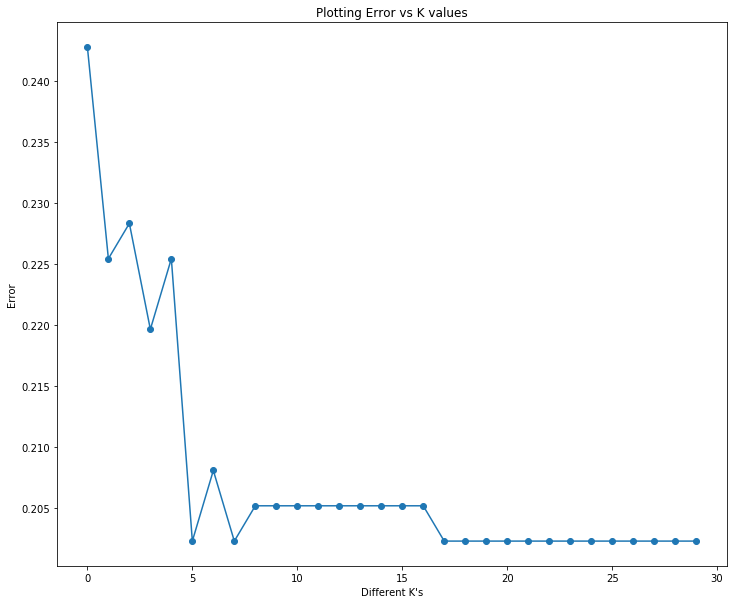

In [12]:
plt.figure(figsize=(12, 10))
plt.plot(error, marker='o')
plt.xlabel("Different K's")
plt.ylabel("Error")
plt.title("Plotting Error vs K values")
plt.show()

Will run the model again based on this discovery

In [13]:
model = KNeighborsClassifier(n_neighbors=20) #K=20
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [14]:
prediction = model.predict(x_test)

Test for accuracy

In [15]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print("Accuracy: ", accuracy_score(prediction, y_test))

[[227  39]
 [ 31  49]]
             precision    recall  f1-score   support

          0       0.88      0.85      0.87       266
          1       0.56      0.61      0.58        80

avg / total       0.81      0.80      0.80       346

Accuracy:  0.797687861272


Only 78% accuracy, will look if certain features are more helpful in predictions

Plotting based on maintenance and safety

In [16]:
#buying = data[(data["Buying"] == 3 | data["Buying"] == 4) \
#              & (data["Acceptable"] == 1)]
#data[data["Buying"] == 3 & data["Acceptable"] == 1]
buying = data.query("(Buying == 4 or Buying == 3) & Acceptable == 1")
maint = data.query("(Maint == 4 or Maint == 3) & Acceptable == 1")
safety = data.query("Safety == 3 & Acceptable == 1")

In [17]:
print(len(buying))
print(len(maint))
print(len(safety))

180
190
269


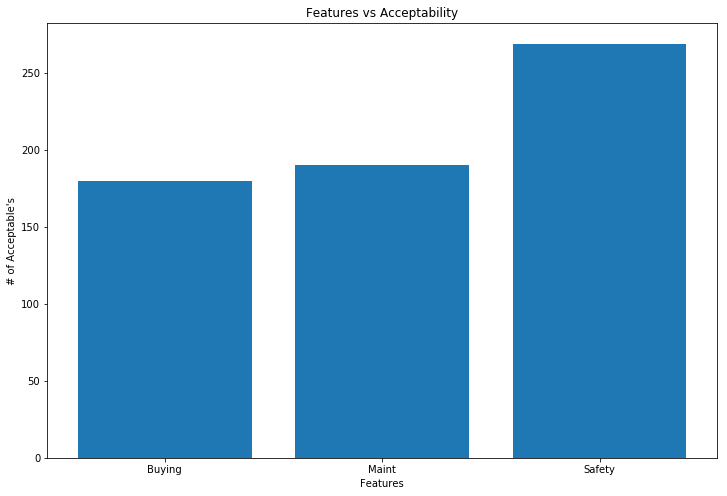

In [18]:
plt.figure(figsize=(12, 8))
plot_data = [len(buying), len(maint), len(safety)]
xs = [i for i,_ in enumerate(plot_data)]
plt.bar(xs, plot_data)
plt.xticks(xs, ["Buying", "Maint", "Safety"])
plt.xlabel("Features")
plt.ylabel("# of Acceptable's")
plt.title("Features vs Acceptability")
plt.show()

Looks like safety has the biggest effect on whether a car is still in acceptable condition. Redo the model

In [19]:
x = data.iloc[:, 1:3]
y = data.iloc[:, 3]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [20]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
prediction = model.predict(x_test)

Test for accuracy

In [23]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print("Accuracy: ", accuracy_score(prediction, y_test))

[[210  48]
 [ 51  37]]
             precision    recall  f1-score   support

          0       0.80      0.81      0.81       258
          1       0.44      0.42      0.43        88

avg / total       0.71      0.71      0.71       346

Accuracy:  0.71387283237


Check if the optimal value of K has changed

In [24]:
error = []
for i in range(1, 31):
    model2 = KNeighborsClassifier(n_neighbors=i)
    model2.fit(x_train, y_train)
    prediction2 = model2.predict(x_test)
    error.append(np.mean(prediction2 != y_test))

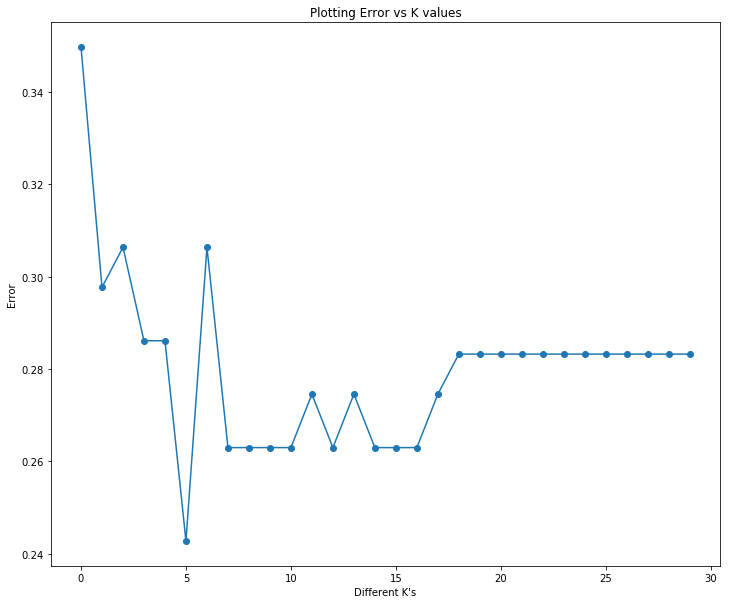

In [25]:
plt.figure(figsize=(12, 10))
plt.plot(error, marker='o')
plt.xlabel("Different K's")
plt.ylabel("Error")
plt.title("Plotting Error vs K values")
plt.show()

In [26]:
model = KNeighborsClassifier(n_neighbors=15) #K=15
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [27]:
prediction = model.predict(x_test)

Test for accuracy

In [28]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[210  48]
 [ 43  45]]
             precision    recall  f1-score   support

          0       0.83      0.81      0.82       258
          1       0.48      0.51      0.50        88

avg / total       0.74      0.74      0.74       346



In [31]:
print(accuracy_score(prediction, y_test))

0.736994219653


### Using only the Maintenance and Safety features increased the accuracy of the model

Create 3D graph of the test data points

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [33]:
not_accepted = np.array([x_test[i, :] for i in range(len(y_test)) if y_test.iloc[i] == 0])
accepted = np.array([x_test[i, :] for i in range(len(y_test)) if y_test.iloc[i] != 0])

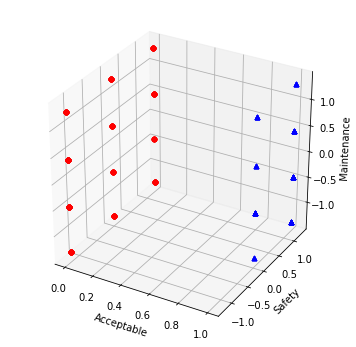

In [34]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(not_accepted)):
    ax.scatter(0, not_accepted[i, 1], not_accepted[i, 0], c='r', marker='o')
for i in range(len(accepted)):
    ax.scatter(1, accepted[i, 1], accepted[i, 0], c='b', marker='^')

ax.set_xlabel("Acceptable")
ax.set_ylabel("Safety")
ax.set_zlabel("Maintenance")

plt.show()

Many of the data points repeated for some reason - maybe during feature scaling

Plotting the training data

In [35]:
not_accepted = np.array([x_train[i, :] for i in range(len(y_train)) if y_train.iloc[i] == 0])
accepted = np.array([x_train[i, :] for i in range(len(y_train)) if y_train.iloc[i] != 0])

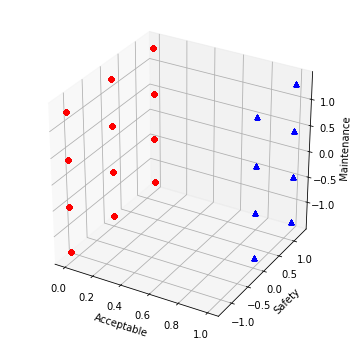

In [36]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(not_accepted)):
    ax.scatter(0, not_accepted[i, 1], not_accepted[i, 0], c='r', marker='o')
for i in range(len(accepted)):
    ax.scatter(1, accepted[i, 1], accepted[i, 0], c='b', marker='^')

ax.set_xlabel("Acceptable")
ax.set_ylabel("Safety")
ax.set_zlabel("Maintenance")

plt.show()

The training data also repeats

Plotting the original data before feature scaling

In [37]:
not_accepted = np.array(data.query("Acceptable == 0").iloc[:, 1:3])
accepted = np.array(data.query("Acceptable != 0").iloc[:, 1:3])

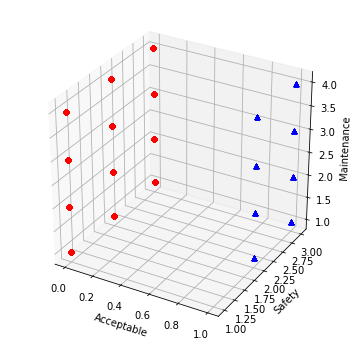

In [38]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(not_accepted)):
    ax.scatter(0, not_accepted[i, 1], not_accepted[i, 0], c='r', marker='o')
for i in range(len(accepted)):
    ax.scatter(1, accepted[i, 1], accepted[i, 0], c='b', marker='^')

ax.set_xlabel("Acceptable")
ax.set_ylabel("Safety")
ax.set_zlabel("Maintenance")

plt.show()

Original data also repeats points